In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,decomposition

## PCA

基于SVD分解，因此它不能用于稀疏矩阵，并且无法适用于超大规模数据（因为需要一次读人内存）

In [2]:
def load_data():
    iris=datasets.load_iris()
    return  iris.data,iris.target

In [3]:
from sklearn import decomposition

def plot_PCA(*data):

    X,y=data
    pca=decomposition.PCA(n_components=2) # 目标维度为2维
    pca.fit(X)
    print('explained variance ratio : %s'% str(pca.explained_variance_ratio_))
    X_r=pca.transform(X) # 原始数据集转换到二维
    
    ###### 绘制二维数据 ########
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),) # 颜色集合，不同标记的样本染不同的颜色
    for label ,color in zip( np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)

    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()

explained variance ratio : [0.92461872 0.05306648]


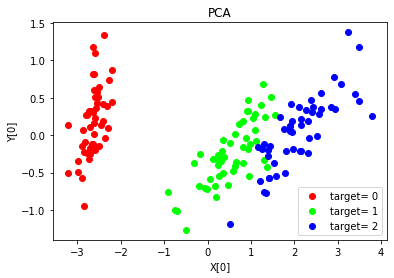

In [4]:
X,y=load_data() # 产生用于降维的数据集
plot_PCA(X,y)   # 调用 plot_PCA

In [5]:
from sklearn import decomposition

def plot_PCA(*data):

    X,y=data
    pca=decomposition.IncrementalPCA(n_components=2, batch_size=4) # 目标维度为2维
    pca.fit(X)
    print('explained variance ratio : %s'% str(pca.explained_variance_ratio_))
    X_r=pca.transform(X) # 原始数据集转换到二维
    
    ###### 绘制二维数据 ########
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),) # 颜色集合，不同标记的样本染不同的颜色
    for label ,color in zip(np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)

    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()

explained variance ratio : [0.92342809 0.05287186]


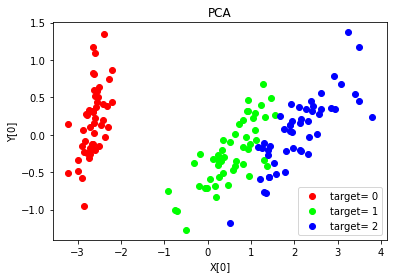

In [6]:
X,y=load_data() # 产生用于降维的数据集
plot_PCA(X,y)

## KPCA

In [13]:
def plot_KPCA(*data):
    '''
    绘制经过 KernelPCA 降维到二维之后的样本点

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    kernels=['linear','poly','rbf','sigmoid']
    
    fig=plt.figure(figsize=(12, 12))
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色

    for i,kernel in enumerate(kernels):
        kpca = decomposition.KernelPCA(n_components=2,kernel=kernel)
        kpca.fit(X)
        X_r = kpca.transform(X)# 原始数据集转换到二维
        ax = plt.subplot(2,2,i+1) ## 两行两列，每个单元显示一种核函数的 KernelPCA 的效果图
        for label ,color in zip( np.unique(y),colors):
            position = (y==label)
            ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,
                        color=color)
        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("kernel=%s"%kernel)
    plt.suptitle("KPCA")
    plt.show()

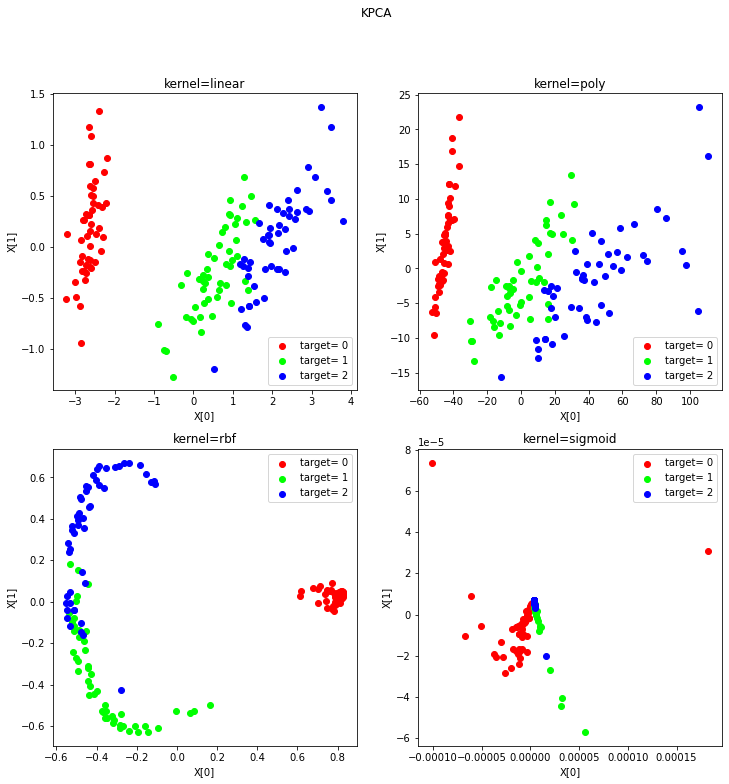

In [14]:
X,y=load_data() # 产生用于降维的数据集
plot_KPCA(X, y)

## MDS

要求原始空间中样本之间的距离在低维空间中得到保持

In [23]:
from sklearn import manifold

def plot_MDS(*data):
    '''
    绘制经过 使用 MDS 降维到二维之后的样本点

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    mds=manifold.MDS(n_components=2)
    X_r=mds.fit_transform(X) #原始数据集转换到二维

    ### 绘制二维图形
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
    for label ,color in zip( np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)

    ax.set_xlabel("X[0]")
    ax.set_ylabel("X[1]")
    ax.legend(loc="best")
    ax.set_title("MDS")
    plt.show()

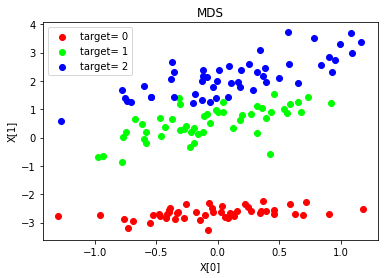

In [24]:
X,y=load_data()
plot_MDS(X,y)

## Isomap

In [31]:
from sklearn import manifold

def plot_Isomap_k(*data):
    '''
    测试 Isomap 中 n_neighbors 参数的影响，其中降维至 2维
    '''
    
    X,y=data
    Ks=[1,5,25,y.size-1] # n_neighbors参数的候选值的集合

    fig=plt.figure(figsize=(12, 12))
    for i, k in enumerate(Ks):
        isomap=manifold.Isomap(n_components=2,n_neighbors=k)
        X_r=isomap.fit_transform(X)#原始数据集转换到二维

        ax=fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示不同 n_neighbors 参数的 Isomap 的效果图
        colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
            (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"
            %label,color=color)

        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("Isomap")
    plt.show()

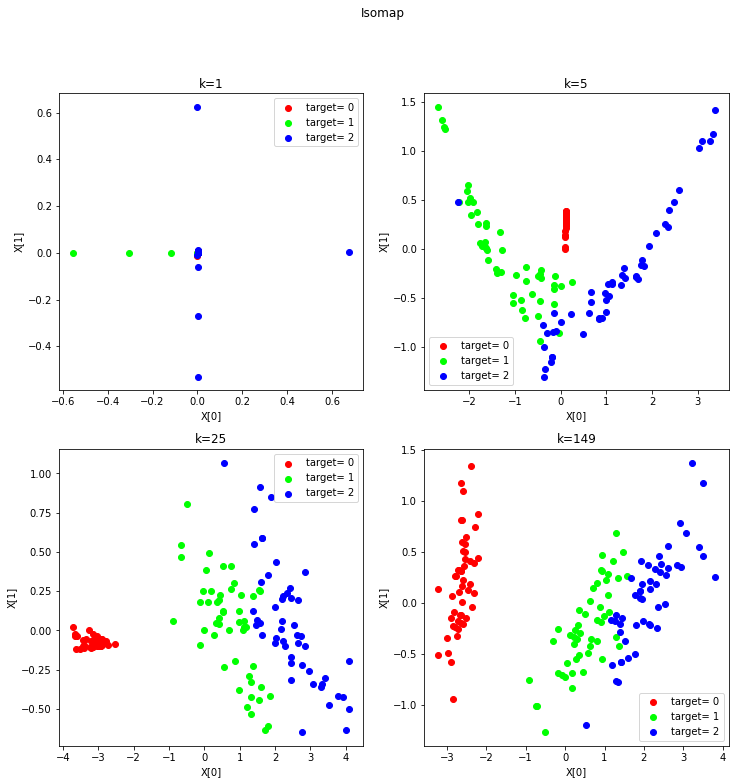

In [32]:
X,y=load_data()
plot_Isomap_k(X,y)

## LLE

保持领域内样本之间的线形关系

In [11]:
from sklearn import manifold

In [17]:
def plot_LocallyLinearEmbedding_k(*data):
    '''
    测试 LocallyLinearEmbedding 中 n_neighbors 参数的影响，其中降维至 2 维
    '''
    
    X,y=data
    Ks=[1,5,25,y.size-1]# n_neighbors参数的候选值的集合

    fig=plt.figure(figsize=(12, 12))
    for i, k in enumerate(Ks):
        lle=manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=k)
        X_r=lle.fit_transform(X)#原始数据集转换到二维

        ax=fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示不同 n_neighbors 参数的 LocallyLinearEmbedding 的效果图
        colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
            (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"
            %label,color=color)

        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("LocallyLinearEmbedding")
    plt.show()

reconstruction_error: -2.408409218489071e-15
reconstruction_error: 6.641420146526329e-08
reconstruction_error: 1.7733139170115222e-05
reconstruction_error: 0.0017244674058922238


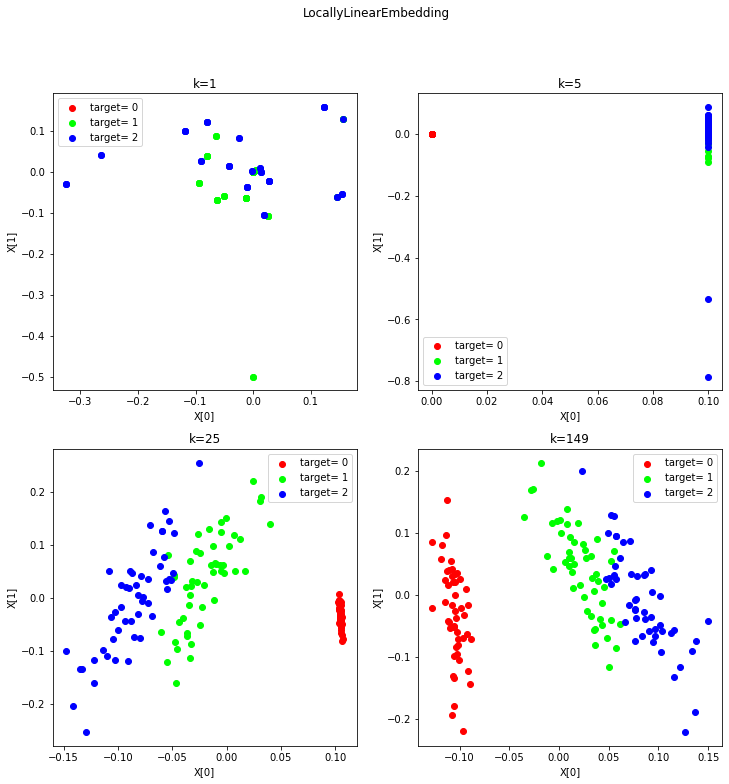

In [18]:
X,y=load_data()
plot_LocallyLinearEmbedding_k(X, y)

如果对某个维度进行缩放，则需要对所有的维度的特征也进行同样的处理。因为流形学习是基于距离来计算的。当改变了某个维度的数据的倍数时（比如改m为cm），会直接影响流形学习的结果

可以利用重构误差选择一个合适的低维空间。在流行学习中，随着维度递增到 n-components，重构误差会递减

流形学习对噪声数据非常敏感。噪声数据可能出现在两个区域的连接处：如果没有噪声，这两个区域是断路的；如果有噪声，这两个区域是短路的